In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
# Define image size and batch size
IMG_SIZE = 224
BATCH_SIZE = 32

In [5]:
#creating training data parameters!
train_datagen =ImageDataGenerator(rescale=1./255,validation_split=0.2)
#creating training data with above parameters and applying transformations!
#folder = parameters.flow_from_directory(path,ts,bs,cm,subset)
train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/Retinal_ICT_Images',target_size=(IMG_SIZE, IMG_SIZE),
 batch_size=BATCH_SIZE,
 class_mode='binary', subset='training'
)

Found 3373 images belonging to 2 classes.


In [6]:
val_generator = train_datagen.flow_from_directory(
'/content/drive/MyDrive/Retinal_ICT_Images',
 target_size=(IMG_SIZE, IMG_SIZE),
 batch_size=BATCH_SIZE,
 class_mode='binary',subset='validation'
)

Found 842 images belonging to 2 classes.


In [7]:
model = keras.Sequential([
 layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(IMG_SIZE, IMG_SIZE, 3)),
 layers.MaxPooling2D((2, 2)),
 layers.Conv2D(64, (3, 3), activation='relu'),
 layers.MaxPooling2D((2, 2)),
 layers.Conv2D(128, (3, 3), activation='relu'),
 layers.MaxPooling2D((2, 2)),
 layers.Flatten(),
 layers.Dense(128, activation='relu'),
 layers.Dense(1, activation='sigmoid')
])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(optimizer='adam', loss='binary_crossentropy',
metrics=['accuracy'])

In [9]:
model.fit(train_generator, epochs=5, validation_data=val_generator,
batch_size= BATCH_SIZE)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
106/106 ━━━━━━━━━━━━━━━━━━━━ 512s 5s/step - accuracy: 0.7216 - loss: 0.5817 - val_accuracy: 0.9335 - val_loss: 0.2428
Epoch 2/5
106/106 ━━━━━━━━━━━━━━━━━━━━ 458s 4s/step - accuracy: 0.8085 - loss: 0.3560 - val_accuracy: 0.9656 - val_loss: 0.1674
Epoch 3/5
106/106 ━━━━━━━━━━━━━━━━━━━━ 455s 4s/step - accuracy: 0.8376 - loss: 0.3121 - val_accuracy: 0.9608 - val_loss: 0.1667
Epoch 4/5
106/106 ━━━━━━━━━━━━━━━━━━━━ 452s 4s/step - accuracy: 0.8334 - loss: 0.2947 - val_accuracy: 0.9204 - val_loss: 0.1919
Epoch 5/5
106/106 ━━━━━━━━━━━━━━━━━━━━ 442s 4s/step - accuracy: 0.8422 - loss: 0.2840 - val_accuracy: 0.9525 - val_loss: 0.1664


In [10]:
model.save('/content/drive/MyDrive/Retinal_ICT_Images/Retinal_Disease_Model.h5')

In [11]:
#Load your model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt #visualisation
import numpy as np
model =load_model('/content/drive/MyDrive/Retinal_ICT_Images/Retinal_Disease_Model.h5')
print("Model Loaded")

Model Loaded


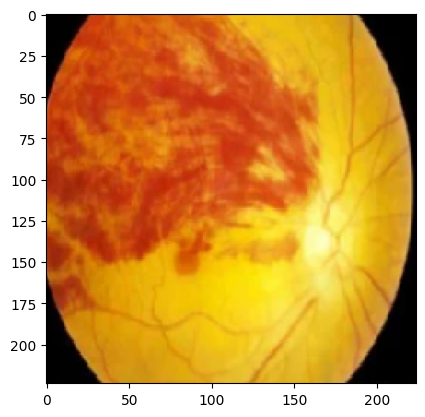

In [12]:
#load and view the test image
test_image_path="/content/testing.png"
img=image.load_img(test_image_path,target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()

In [13]:
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array /= 255.
prediction = model.predict(img_array)
if prediction >= 0.5:
 print("You have Retinal disease")
else:
 print("You do not have Retinal disease.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
You have Retinal disease
